Spring 2022

This notebook is the exploratory analysis and model training of the dataset, "Spotify Tracks DB." 

The algorithms used are KNeighborsClassifier, GaussianNaiveBayes, LinearDiscriminantAnalysis, and DecisionTreeClassifier.

The aim of this project was to explore the definition of the 'popularity' measure of Spotify music by classifying songs into high, medium, and low popularity classes. The goal of this was to learn what factors go into calculating 'popularity' in order to predict to what extent a song will be enjoyed.
 
 
The data explored is a musical dataset titled "Spotify Tracks DB," retrieved from kaggle.com.
 
The dataset contains a little over 232,000 songs and 18 columns including song title, artist, popularity score, and many other metrics like energy, danceability, etc. 

Link to the dataset: 
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

**Group Members:** Katie Christensen, Meghan Lindhorst, Dannan Gallagher, Daniel Wertz

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('SpotifyFeatures.csv')

In [ ]:
# Prep the data
count_artist = {}
pop_artist = {}

df = shuffle(df)

print('Shape before dropping duplicates: ', df.shape) 
df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
print('Shape after dropping duplicates: ', df.shape) 

df['time_signature'] = df['time_signature'].astype(str)
df['time_signature'] = df['time_signature'].str.split('/').str[0]

df['mode'] = df['mode'].str.replace('Major', '1')
df['mode'] = df['mode'].str.replace('Minor', '0')

count_artist = df['artist_name'].value_counts()

count_df = DataFrame(data = count_artist)
count_df = count_df.reset_index(drop = False)
count_df = count_df.rename(columns = {'index': 'artist_name', 'artist_name': 'song_count'})
df = df.merge(count_df, on = ['artist_name'])

df = df.reset_index(drop = True)

Shape before dropping duplicates:  (232725, 18)
Shape after dropping duplicates:  (176514, 18)


#Exploratory Analysis

In [ ]:
rows = len(df)
cols = len(df.columns)

# How many datapoints?
print("Number of datapoints: ", rows*cols) 

# How many rows and columns?
print("Number of columns in dataset: ", cols)
print("Number of rows in dataset: ", rows) 

Number of datapoints:  3353766
Number of columns in dataset:  19
Number of rows in dataset:  176514


Text(0.5, 1.0, 'Missing Value Heatmap')


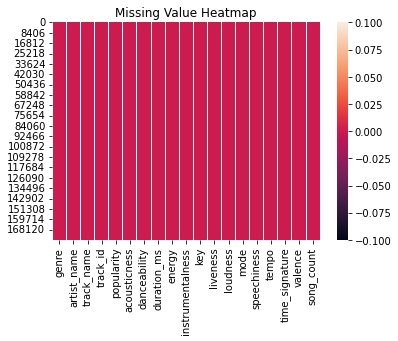

In [ ]:
# Does the dataset contain any missing values?
print(sns.heatmap(df.isnull()).set_title('Missing Value Heatmap')) # no missing values

In [ ]:
# Do any of the columns correlate to one another? (correlation map)
corr = df[['popularity','acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness', 
           'liveness', 'loudness', 'speechiness', 'valence']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) # warmer colors means higher correlation, 
                      # cooler colors means lower correlation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.00,-0.36,0.22,0.02,0.24,-0.15,-0.16,0.32,-0.16,0.05
acousticness,-0.36,1.00,-0.38,0.01,-0.73,0.31,0.08,-0.69,0.17,-0.35
danceability,0.22,-0.38,1.00,-0.12,0.37,-0.37,-0.03,0.46,0.13,0.59
duration_ms,0.02,0.01,-0.12,1.00,-0.03,0.07,0.02,-0.04,-0.01,-0.15
energy,0.24,-0.73,0.37,-0.03,1.00,-0.39,0.21,0.82,0.16,0.45
instrumentalness,-0.15,0.31,-0.37,0.07,-0.39,1.00,-0.16,-0.50,-0.19,-0.33
liveness,-0.16,0.08,-0.03,0.02,0.21,-0.16,1.00,0.06,0.56,0.01
loudness,0.32,-0.69,0.46,-0.04,0.82,-0.50,0.06,1.00,0.00,0.43
speechiness,-0.16,0.17,0.13,-0.01,0.16,-0.19,0.56,0.00,1.00,0.02
valence,0.05,-0.35,0.59,-0.15,0.45,-0.33,0.01,0.43,0.02,1.00


####Most correlated per each attribute:
* **popularity:** loudness, danceability, energy
* **acousticness:** instrumentalness
* **danceability:** valence, loudness, energy, popularity
* **duration_ms:** n/a
* **energy:** loudness, danceability, popularity
* **instrumentalness:** acousticness
* **liveness:** n/a
* **loudness:** energy, danceability, popularity
* **speechiness:** liveness
* **valence:** danceability, energy, loudness


*From this, it can be concluded that the five main attributes are: valence, loudness, energy, popularity, and danceability.*

In [ ]:
# Top 50 most popular tracks
top_50 = df.sort_values('popularity', ascending=False).head(50)
display(top_50[['artist_name', 'track_name', 'popularity', 'energy', 'danceability', 'loudness', 'valence']])

,artist_name,track_name,popularity,energy,danceability,loudness,valence
42983,Ariana Grande,7 rings,100,0.321,0.725,-10.744,0.319
42976,Ariana Grande,"break up with your girlfriend, i'm bored",99,0.554,0.726,-5.290,0.335
51193,Post Malone,Wow.,99,0.539,0.833,-7.399,0.385
46051,Daddy Yankee,Con Calma,98,0.860,0.737,-2.652,0.656
101110,Marshmello,Happier,97,0.792,0.687,-2.749,0.671
57131,Halsey,Without Me,97,0.488,0.752,-7.050,0.533
150827,Ava Max,Sweet but Psycho,97,0.704,0.719,-4.724,0.628
160318,Pedro Capó,Calma - Remix,97,0.773,0.826,-4.218,0.761
51203,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,97,0.479,0.760,-5.574,0.913
101033,Sam Smith,Dancing With A Stranger (with Normani),97,0.520,0.741,-7.513,0.347


Text(0.5, 0.98, 'Attributes Vs Popularity')

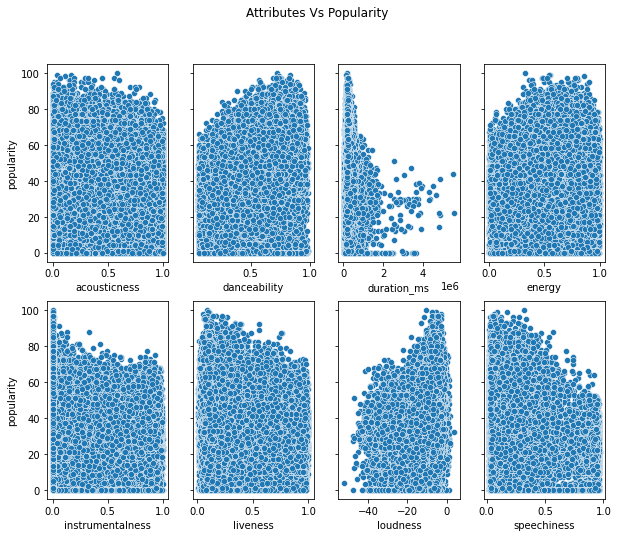

In [ ]:
from scipy import stats

fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(ncols=4, nrows = 2, sharey=True, figsize=(10,8))
p0 = sns.scatterplot(x = 'acousticness', y = "popularity", data = df, ax=ax0)
p1 = sns.scatterplot(x = 'danceability', y = "popularity", data = df, ax=ax1)
p2 = sns.scatterplot(x = 'duration_ms', y = "popularity", data = df, ax=ax2)
p3 = sns.scatterplot(x = 'energy', y = "popularity", data = df, ax=ax3)
p4 = sns.scatterplot(x = 'instrumentalness', y = "popularity", data = df, ax=ax4)
p5 = sns.scatterplot(x = 'liveness', y = "popularity", data = df, ax=ax5)
p6 = sns.scatterplot(x = 'loudness', y = "popularity", data = df, ax=ax6)
p7 = sns.scatterplot(x = 'speechiness', y = "popularity", data = df, ax=ax7)
fig.suptitle('Attributes Vs Popularity')

Text(0.5, 1.0, 'Mean Popularity per Genre')

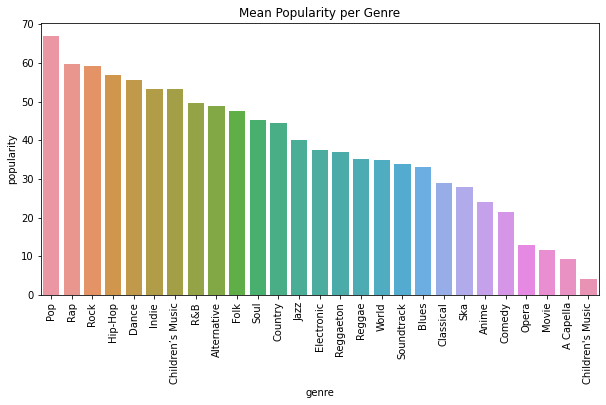

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
result = df.groupby(["genre"])['popularity'].mean().reset_index().sort_values('popularity', ascending = False)
sns.barplot(x='genre', y="popularity", data=df, order=result['genre'], ci = 0).set_title('Mean Popularity per Genre')


# Looking at the graph, it became abundantly clear that we need to incorporate the genre column into our model. 
# We decided to do this by implementing ordinal encoding. We also chose to encode the artist column. 
# This vastly improved the accuracy of our models.

#Model Selection and Training

In [ ]:
# Prepping data

from sklearn.model_selection import train_test_split

df['popularity'] = pd.qcut(df['popularity'], q=3, labels = ["low", "med", "high"])

enc = OrdinalEncoder()
enc.fit(df[["artist_name","genre"]])
df[["artist_name","genre"]] = enc.transform(df[["artist_name","genre"]])

all_x = df[['acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness', 'liveness', 
            'loudness', 'speechiness', 'valence', 'time_signature', 'mode', "artist_name", "genre", 'song_count']].to_numpy()
all_y = df["popularity"].to_numpy()

scaler = preprocessing.StandardScaler()
scaler.fit(all_x)
all_x = scaler.transform(all_x)

# Splits 70:15:15
x_trval, x_test, y_trval, y_test = train_test_split(all_x,all_y,test_size=0.16, random_state=1)
x_tr, x_val, y_tr, y_val = train_test_split(x_trval,y_trval, test_size=0.2, random_state=1)

Baseline Metrix:
               precision    recall  f1-score   support

        high       0.32      0.31      0.31      9393
         low       0.34      0.35      0.34      9971
         med       0.35      0.34      0.34     10291

    accuracy                           0.33     29655
   macro avg       0.33      0.33      0.33     29655
weighted avg       0.33      0.33      0.33     29655


Accuracy Score:  0.33397403473276005


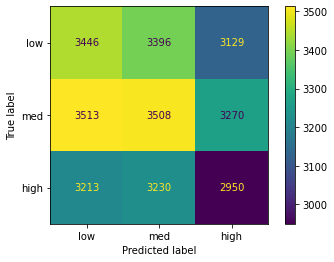

In [ ]:
# Baseline

from sklearn.dummy import DummyClassifier

h = DummyClassifier(strategy="stratified", random_state=1)
h.fit(x_tr, y_tr)
baseline_pred = h.predict(x_val)

print("Baseline Metrix:\n", metrics.classification_report(y_val, baseline_pred))
labels = ['low', 'med', 'high']
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, baseline_pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, baseline_pred)) 

KNeighbors Metrix:
               precision    recall  f1-score   support

        high       0.55      0.66      0.60      9393
         low       0.66      0.66      0.66      9971
         med       0.50      0.41      0.46     10291

    accuracy                           0.57     29655
   macro avg       0.57      0.58      0.57     29655
weighted avg       0.57      0.57      0.57     29655


Accuracy Score:  0.5725847243297926


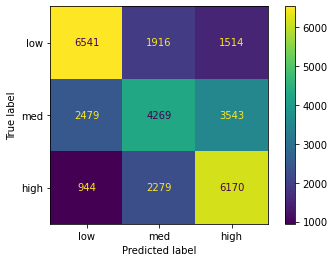

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

h = KNeighborsClassifier(n_neighbors=5)
h.fit(x_tr, y_tr)
pred = h.predict(x_val)

print("KNeighbors Metrix:\n", metrics.classification_report(y_val, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, pred)) 

In [ ]:
# From exploratory analysis, just using: valence, loudness, energy, and danceability

explore_x = df[['danceability','energy','loudness','valence',]].to_numpy()

x_trval_e, x_test_e, y_trval_e, y_test_e = train_test_split(explore_x,all_y,test_size=0.16, random_state=1)
x_tr_e, x_val_e, y_tr_e, y_val_e = train_test_split(x_trval_e,y_trval_e, test_size=0.2, random_state=1)

KNeighbors Metrix:
               precision    recall  f1-score   support

        high       0.43      0.56      0.49      9393
         low       0.47      0.50      0.48      9971
         med       0.37      0.25      0.30     10291

    accuracy                           0.43     29655
   macro avg       0.42      0.44      0.42     29655
weighted avg       0.42      0.43      0.42     29655


Accuracy Score:  0.43125948406676784


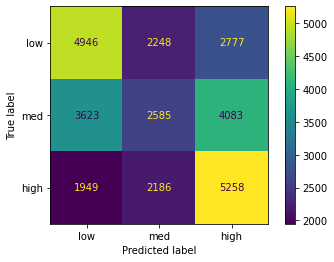

In [ ]:
# Trying KNeighbors with specific exploratory analysis columns

h = KNeighborsClassifier(n_neighbors=5)
h.fit(x_tr_e, y_tr_e)
pred = h.predict(x_val_e)

print("KNeighbors Metrix:\n", metrics.classification_report(y_val_e, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val_e, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val_e, pred)) 


# Final thoughts on using fewer columns (found in the exploratory analysis) as input:
# The accuracy decreased when using just these four, so we will continute to use all of the columns.

Gaussian Metrix:
               precision    recall  f1-score   support

        high       0.45      0.85      0.59      9393
         low       0.70      0.42      0.52      9971
         med       0.45      0.27      0.34     10291

    accuracy                           0.50     29655
   macro avg       0.54      0.51      0.48     29655
weighted avg       0.54      0.50      0.48     29655


Accuracy Score:  0.5041308379699881


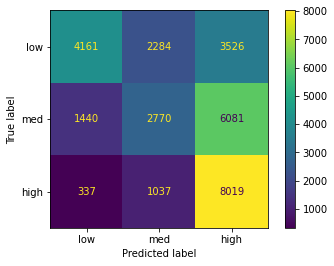

In [ ]:
from sklearn.naive_bayes import GaussianNB

h = GaussianNB()
h.fit(x_tr, y_tr)
pred = h.predict(x_val)

print("Gaussian Metrix:\n", metrics.classification_report(y_val, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, pred)) 

LinearDiscriminantAnalysis Metrix:
               precision    recall  f1-score   support

        high       0.50      0.68      0.58      9393
         low       0.70      0.47      0.57      9971
         med       0.45      0.45      0.45     10291

    accuracy                           0.53     29655
   macro avg       0.55      0.53      0.53     29655
weighted avg       0.55      0.53      0.53     29655


Accuracy Score:  0.5301635474624853


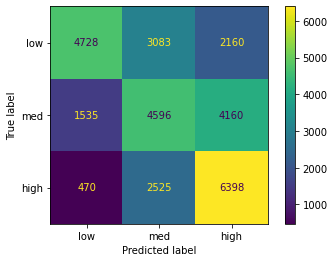

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

h = LinearDiscriminantAnalysis()
h.fit(x_tr, y_tr)
pred = h.predict(x_val)
 
print("LinearDiscriminantAnalysis Metrix:\n", metrics.classification_report(y_val, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, pred)) 

DecisionTree Metrix:
               precision    recall  f1-score   support

        high       0.71      0.71      0.71      9393
         low       0.73      0.73      0.73      9971
         med       0.56      0.56      0.56     10291

    accuracy                           0.66     29655
   macro avg       0.66      0.66      0.66     29655
weighted avg       0.66      0.66      0.66     29655


Accuracy Score:  0.6617771033552521


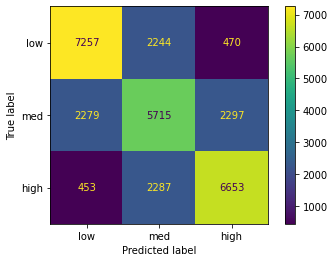

In [ ]:
from sklearn import tree

h = tree.DecisionTreeClassifier(random_state=0)
h.fit(x_tr, y_tr)
pred = h.predict(x_val)
 
print("DecisionTree Metrix:\n", metrics.classification_report(y_val, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, pred))


#In all our testing, we decided that the decision tree classifier worked the best, 
#therefore that is the model we chose to continue to optimize the hyperparameters of the model. 

DecisionTree Metrix:
               precision    recall  f1-score   support

        high       0.82      0.72      0.76      9393
         low       0.80      0.73      0.77      9971
         med       0.59      0.71      0.65     10291

    accuracy                           0.72     29655
   macro avg       0.74      0.72      0.73     29655
weighted avg       0.74      0.72      0.72     29655


Accuracy Score:  0.720215815208228


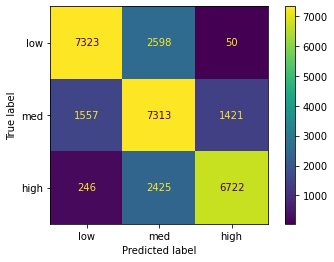

In [ ]:
# Decision Tree with hyperparameter tuning

h = tree.DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=4,min_samples_split = 450)
h.fit(x_tr, y_tr)
pred = h.predict(x_val)
 
print("DecisionTree Metrix:\n", metrics.classification_report(y_val, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_val, pred))

Text(0.5, 1.0, 'Feature importances')

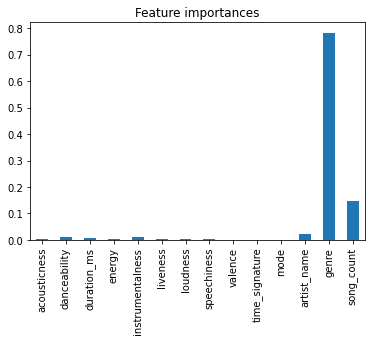

In [ ]:
# Feature Importance Map

feature_importances = pd.Series(h.feature_importances_, index=('acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness', 
                                                               'liveness', 'loudness', 'speechiness', 'valence', 'time_signature', 'mode', 
                                                               "artist_name", "genre", 'song_count'))
fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

#RUNNING ON TEST SET:

DecisionTree Metrix:
               precision    recall  f1-score   support

        high       0.82      0.72      0.77      8945
         low       0.81      0.73      0.76      9409
         med       0.60      0.72      0.65      9889

    accuracy                           0.72     28243
   macro avg       0.74      0.72      0.73     28243
weighted avg       0.74      0.72      0.73     28243


Accuracy Score:  0.7215947314378784


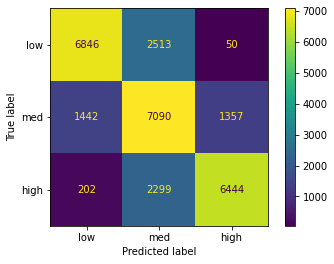

In [ ]:
h = tree.DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=4,min_samples_split = 450)
h.fit(x_tr, y_tr)
pred = h.predict(x_test)
 
print("DecisionTree Metrix:\n", metrics.classification_report(y_test, pred))
confusion_m = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, labels = labels)
print('\nAccuracy Score: ', metrics.accuracy_score(y_test, pred))

In [ ]:
# Decision Tree

plt.figure(figsize = (200,40))
tree.plot_tree(h, feature_names= ('acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness', 
                                  'liveness', 'loudness', 'speechiness', 'valence', 'time_signature', 'mode', 
                                  "artist_name", "genre", "song_count"),  class_names = ("low", "medium", "high"),
                   filled=True, fontsize = 8)